## Dataset: Rain in Australia (Classification Problem) 

## Model Training

In [1]:
# import the pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to show all the columns of the dataframe in the notebeook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
from pandas.errors import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.model_selection import (
    cross_validate,
    RepeatedStratifiedKFold, 
    StratifiedShuffleSplit)

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix,
    auc,
    roc_curve)

from feature_engine.encoding import OrdinalEncoder

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

## Step 1: Data Transformation

### Preparing X and Y variables

In [2]:
df = pd.read_csv("./processed_data/weather.csv")
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,season
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0,winter
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0,winter
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0,winter
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0,winter
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0,summer
142189,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0,summer
142190,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0,summer
142191,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0,summer


In [3]:
# convert the columns with the correct datatype 
df['WindGustSpeed'] = df['WindGustSpeed'].astype("Int64")
df['WindSpeed9am'] = df['WindSpeed9am'].astype("Int64")
df['WindSpeed3pm'] = df['WindSpeed3pm'].astype("Int64")
df['Humidity9am'] = df['Humidity9am'].astype("Int64")
df['Humidity3pm'] = df['Humidity3pm'].astype("Int64")
df['Cloud9am'] = df['Cloud9am'].astype("Int64")
df['Cloud3pm'] = df['Cloud3pm'].astype("Int64")
df['RainToday'] = df['RainToday'].astype("Int64")

In [4]:
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

In [5]:
X = df.drop(columns=['RainTomorrow'],axis=1)
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,season
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44,W,WNW,20,24,71,22,1007.7,1007.1,8,<NA>,16.9,21.8,0,winter
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44,NNW,WSW,4,22,44,25,1010.6,1007.8,<NA>,<NA>,17.2,24.3,0,winter
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46,W,WSW,19,26,38,30,1007.6,1008.7,<NA>,2,21.0,23.2,0,winter
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24,SE,E,11,9,45,16,1017.6,1012.8,<NA>,<NA>,18.1,26.5,0,winter
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41,ENE,NW,7,20,82,33,1010.8,1006.0,7,8,17.8,29.7,0,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,0.0,NaN,NaN,E,31,ESE,E,15,13,59,27,1024.7,1021.2,<NA>,<NA>,9.4,20.9,0,summer
142189,Uluru,2.8,23.4,0.0,NaN,NaN,E,31,SE,ENE,13,11,51,24,1024.6,1020.3,<NA>,<NA>,10.1,22.4,0,summer
142190,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22,SE,N,13,9,56,21,1023.5,1019.1,<NA>,<NA>,10.9,24.5,0,summer
142191,Uluru,5.4,26.9,0.0,NaN,NaN,N,37,SE,WNW,9,9,53,24,1021.0,1016.8,<NA>,<NA>,12.5,26.1,0,summer


In [6]:
y = df['RainTomorrow']
y

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 142193, dtype: int64

In [7]:
train_idx, test_idx = next(strat_shuff_split.split(X, y))

In [8]:
train_set = df.loc[train_idx]  
train_set

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,season
25434,Penrith,10.6,24.9,0.0,NaN,NaN,NW,20,SSW,NaN,4,0,68,47,NaN,NaN,<NA>,<NA>,16.7,23.3,0,0,spring
81400,Dartmoor,6.0,15.1,1.6,NaN,NaN,NW,41,NNW,NW,15,24,94,77,1023.0,1024.0,<NA>,<NA>,10.6,13.9,1,0,autumn
12635,Moree,24.6,41.4,0.0,12.4,12.8,NE,31,NNE,ENE,20,11,51,24,1012.7,1009.6,0,1,30.1,39.3,0,0,winter
58338,Bendigo,3.7,12.6,6.6,1.4,NaN,NW,41,WNW,NW,15,19,95,71,1011.3,1009.4,8,8,8.5,12.2,1,1,summer
76742,Watsonia,7.6,27.9,0.0,8.0,12.5,N,54,NE,N,9,22,57,36,1026.6,1023.1,1,1,19.8,27.3,0,0,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5426,BadgerysCreek,19.7,34.6,5.0,NaN,NaN,SE,33,N,ESE,7,19,65,53,1010.3,1011.1,<NA>,<NA>,27.0,29.2,1,0,winter
69572,Mildura,12.4,32.3,0.0,10.2,10.5,NE,24,E,E,13,9,43,19,1017.9,1014.4,4,6,21.2,29.9,0,0,autumn
7719,Cobar,23.0,34.1,0.0,8.2,NaN,W,56,NNW,W,20,28,73,19,1002.1,999.2,7,1,25.6,33.3,0,0,winter
117112,PerthAirport,14.7,30.4,0.0,7.0,12.4,E,52,S,SW,13,30,58,40,1019.7,1016.0,1,2,22.6,28.1,0,0,autumn


In [9]:
test_set = df.loc[test_idx]
test_set

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,season
58460,Bendigo,19.8,27.9,0.0,4.6,NaN,WNW,41,SSE,NW,9,17,56,48,1007.7,1007.1,5,1,24.3,27.1,0,1,winter
32845,SydneyAirport,18.5,24.0,0.8,8.8,11.4,S,39,S,S,9,28,81,72,1015.5,1016.5,1,3,21.8,23.7,0,0,winter
29447,Richmond,9.4,21.2,0.0,NaN,NaN,SW,28,SSW,SSE,9,11,64,23,1024.5,1023.1,<NA>,<NA>,17.1,20.9,0,0,spring
86381,Cairns,20.8,28.1,13.6,4.0,8.0,SE,37,S,SSE,15,24,75,63,1017.1,1013.7,7,6,24.2,26.2,1,0,spring
55385,Ballarat,7.3,11.5,9.2,NaN,NaN,W,44,W,WSW,28,24,98,98,1014.1,1013.9,6,8,9.1,10.3,1,1,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135240,AliceSprings,-1.2,18.4,0.0,4.4,10.7,ESE,39,NE,E,2,19,54,25,1026.3,1022.6,0,0,8.7,17.4,0,0,summer
43090,Wollongong,20.9,24.8,0.0,NaN,NaN,S,61,NE,S,11,26,88,87,1007.0,1005.8,<NA>,<NA>,22.7,23.1,0,1,winter
116604,PerthAirport,9.2,17.8,3.8,2.2,2.4,SSW,33,N,WSW,11,11,95,94,1021.0,1018.8,7,6,12.2,16.8,1,1,summer
120713,Perth,20.3,42.4,0.0,11.4,13.0,N,41,NE,NNE,19,9,29,14,1008.0,1001.7,1,1,30.4,41.8,0,0,winter


In [10]:
target_column_name="RainTomorrow"

input_feature_train_df=train_set.drop(columns=[target_column_name],axis=1)
target_feature_train_df=train_set[target_column_name]

In [11]:
input_feature_test_df=test_set.drop(columns=[target_column_name],axis=1)
target_feature_test_df=test_set[target_column_name]

In [12]:
# Create Column Transformer with 3 types of transformers
numerical_columns = X.select_dtypes(exclude="object").columns
categorical_columns = X.select_dtypes(include="object").columns

num_pipeline= Pipeline(
                steps=[ 
                        ("imputer",SimpleImputer(strategy="median")),
                        ("scaler",StandardScaler())
                      ]
                    )
                
cat_pipeline=Pipeline(
                steps=[
                        ("imputer", SimpleImputer(strategy="most_frequent")),
                        ("ordinal_encoder", OrdinalEncoder(encoding_method='arbitrary')),
                        ("scaler", StandardScaler(with_mean=False))
                ]
                    )        
                    
preprocessor=ColumnTransformer(
                [
                    ("num_pipeline",num_pipeline,numerical_columns),
                    ("cat_pipelines",cat_pipeline,categorical_columns)
                ]
                            )

In [13]:
input_feature_train_arr=preprocessor.fit(input_feature_train_df, target_feature_train_df)
input_feature_train_arr=preprocessor.transform(input_feature_train_df)
input_feature_test_arr=preprocessor.transform(input_feature_test_df)

## Step 2: Machine Learning Modelling  <a id="part9"></a>

### Train and Test Split  <a id="part9.1"></a>

In [14]:
# separate dataset into train and test

train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df)]

test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]

X_train,y_train,X_test,y_test=(
                train_arr[:,:-1],
                train_arr[:,-1],
                test_arr[:,:-1],
                test_arr[:,-1]
            )

In [15]:
X_train

array([[-0.24647819,  0.23498784, -0.27536409, ...,  0.        ,
         0.        ,  0.        ],
       [-0.96619454, -1.14146495, -0.08597762, ...,  0.22887299,
         0.21505166,  0.88357648],
       [ 1.94396291,  2.55248488, -0.27536409, ...,  0.45774598,
         0.43010333,  1.76715297],
       ...,
       [ 1.69362678,  1.52716801, -0.27536409, ...,  0.22887299,
         1.72041332,  1.76715297],
       [ 0.39500813,  1.00748685, -0.27536409, ...,  3.43309481,
         2.79567164,  0.88357648],
       [ 0.55146821,  0.44566939, -0.27536409, ...,  0.45774598,
         1.93546498,  0.        ]])

In [16]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

### Model evaluation functions

In [17]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [18]:
def display_confusion_matrix(y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)         
    plt.title('Confusion Matrix (Test Data)')
    sns.heatmap(cm, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')        
    plt.show()

In [19]:
def display_roc_curve(y_test, y_test_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    auc_ = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Classifier (area = {:.3f})'.format(auc_))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

### Model Training with RepeatedStratifiedKFold Cross-Validation

In [20]:
models = {
            "k-NN": KNeighborsClassifier(),
            "Decision Tree": DecisionTreeClassifier(random_state=42),
            "BernoulliNB": BernoulliNB(),
            "LogisticRegression": LogisticRegression(random_state=42),
            "HistGradientBoostingClassifier": HistGradientBoostingClassifier(),
            "XGBClassifier": XGBClassifier(),
         }


params={
            "k-NN": {"n_neighbors": [10, 20, 30 , 40]},
            
            "Decision Tree":{
                'max_depth': [1, 3, 5, 7],
                'max_features': [1, 10, 20 , 30]
                            },
    
            "BernoulliNB":{},
    
            "LogisticRegression":{
                'solver': ['lbfgs', 'liblinear', 'newton-cholesky'],
                'C': [0.01, 0.1, 1, 10],
                'max_iter': [100, 1000, 10000]
                                 },
            
            "HistGradientBoostingClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'max_depth': [6,8,10]
                },
     
            "XGBClassifier":{
            'learning_rate':[.1,.01,.001],
            'n_estimators': [8,16,32,64,128]
                            }
     
        }

# record each set of results
model_list = []
params_list = []
f1_list = []
recall_list = []
precision_list = []
accuracy_list = []

for i in range(len(list(models))):
    
    model = list(models.values())[i]
    para=params[list(models.keys())[i]]
    gs = GridSearchCV(model,para, n_jobs = -1, scoring = 'roc_auc')
    gs.fit(X_train, y_train)
    cv = RepeatedStratifiedKFold(n_splits= 3, n_repeats=1, random_state=0)
    scores = cross_validate(gs, X_train, y_train, scoring=['roc_auc'], n_jobs=-1)
    params_list.append(gs.best_params_)
    model.set_params(**gs.best_params_)
    model.fit(X_train, y_train) # Train model
        
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(list(models.keys())[i])
    print(len(list(models.keys())[i]) * '-')

    print('Model performance')
    train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                       measure_error(y_test, y_test_pred, 'test')],
                                       axis=1)
    display(train_test_full_error)
    model_list.append(list(models.keys())[i])

    accuracy_list.append(train_test_full_error['test'].values[0])
    precision_list.append(train_test_full_error['test'].values[1])
    recall_list.append(train_test_full_error['test'].values[2])
    f1_list.append(train_test_full_error['test'].values[3])

    print('='*35)
    print('\n')
        

k-NN
----
Model performance


,train,test
accuracy,0.843834,0.840288
precision,0.786816,0.773469
recall,0.416151,0.406672
f1,0.544378,0.533068




Decision Tree
-------------
Model performance


,train,test
accuracy,0.845039,0.840194
precision,0.734865,0.720173
recall,0.483060,0.469623
f1,0.582932,0.568517




BernoulliNB
-----------
Model performance


,train,test
accuracy,0.789381,0.789254
precision,0.528008,0.527487
recall,0.570270,0.574924
f1,0.548326,0.550185




LogisticRegression
------------------
Model performance


,train,test
accuracy,0.842397,0.844296
precision,0.717179,0.723557
recall,0.490365,0.494301
f1,0.582471,0.587351




HistGradientBoostingClassifier
------------------------------
Model performance


,train,test
accuracy,0.865243,0.857073
precision,0.780842,0.755982
recall,0.554540,0.535188
f1,0.648516,0.626707




XGBClassifier
-------------
Model performance


,train,test
accuracy,0.871312,0.857424
precision,0.802534,0.762084
recall,0.564982,0.529227
f1,0.663125,0.624661


### Results

In [21]:
df_results = pd.DataFrame(list(zip(model_list, f1_list,  recall_list, precision_list, accuracy_list, params_list)), columns=['Model Name', 'F1_Score', 'Recall_Score', 'Precision_Score', 'Accuracy_Score', 'Best_Params']).sort_values(by=["F1_Score"],ascending=False).reset_index(drop=True)
df_results.index += 1
df_results

,Model Name,F1_Score,Recall_Score,Precision_Score,Accuracy_Score,Best_Params
1,HistGradientBoostingClassifier,0.626707,0.535188,0.755982,0.857073,"{'learning_rate': 0.1, 'max_depth': 10}"
2,XGBClassifier,0.624661,0.529227,0.762084,0.857424,"{'learning_rate': 0.1, 'n_estimators': 128}"
3,LogisticRegression,0.587351,0.494301,0.723557,0.844296,"{'C': 10, 'max_iter': 100, 'solver': 'liblinear'}"
4,Decision Tree,0.568517,0.469623,0.720173,0.840194,"{'max_depth': 7, 'max_features': 30}"
5,BernoulliNB,0.550185,0.574924,0.527487,0.789254,{}
6,k-NN,0.533068,0.406672,0.773469,0.840288,{'n_neighbors': 40}


## Step 3: Predictions

### XGBClassifier  <a id="part9.6"></a>

### Confusion Matrix

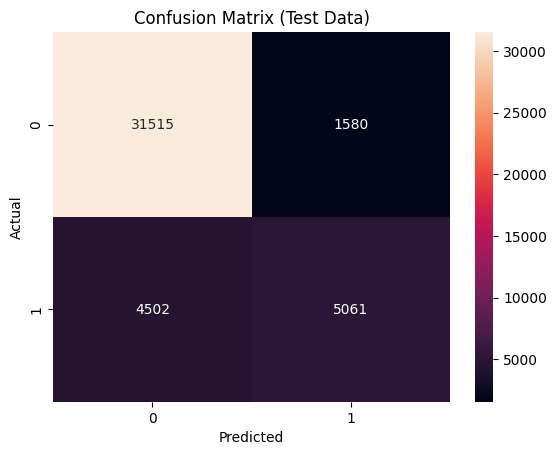

In [22]:
XGB_model = XGBClassifier(learning_rate=0.1, n_estimators=128)
XGB_model = XGB_model.fit(X_train, y_train)

y_test_pred = XGB_model.predict(X_test)

display_confusion_matrix(y_test, y_test_pred)

### ROC Curve

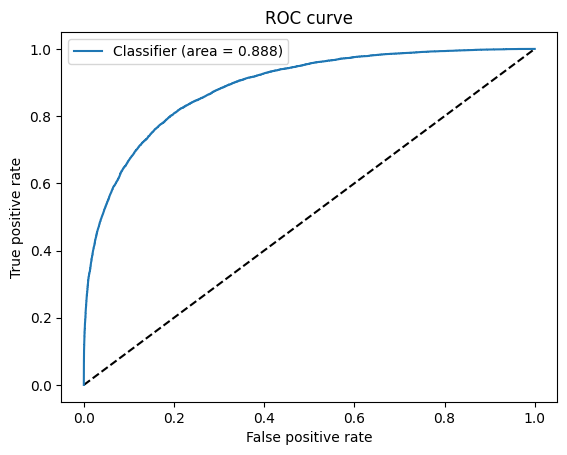

In [23]:
XGB_model = XGBClassifier(learning_rate=0.1, n_estimators=128)
XGB_model = XGB_model.fit(X_train, y_train)

y_test_pred = XGB_model.predict_proba(X_test)[:, 1]

display_roc_curve(y_test, y_test_pred)

## Summary of results
After optimization of all models, the best performing Classifier that gives the lowest False Positives and False Negatives is XGBClassifier. It has the highest F1 score of 0.624661 amongst others

## End of Notebook